In [24]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split

In [25]:
yogesh=os.listdir("C:/Users/ai39/Desktop/Image-Recognition-main/Charles Leclerc/")
ashok=os.listdir("C:/Users/ai39/Desktop/Image-Recognition-main/max verstappen/")
scarlet=os.listdir("C:/Users/ai39/Desktop/Image-Recognition-main/PIerre Gasly/")

In [26]:
limit=10
yogesh_images = [None]*limit
ashok_images = [None]*limit
scarlet_images = [None]*limit
j=0
for i in yogesh:
    if (j<limit):
        yogesh_images[j]= imread("C:/Users/ai39/Desktop/Image-Recognition-main/Charles Leclerc/"+i)
        j+=1
    else:
        break

j=0
for i in ashok:
    if(j<limit):
        ashok_images[j]=imread("C:/Users/ai39/Desktop/Image-Recognition-main/max verstappen/"+i)
        j+=1
    else:
        break

j=0
for i in scarlet:
    if(j<limit):
        scarlet_images[j]=imread("C:/Users/ai39/Desktop/Image-Recognition-main/PIerre Gasly/"+i)
        j+=1
    else:
        break

In [27]:
yogesh_gray=[None]*limit
ashok_gray=[None]*limit
scarlet_gray=[None]*limit
j=0

for i in yogesh:
    if(j<limit):
        yogesh_gray[j]=rgb2gray(yogesh_images[j])
        j+=1
    else:
        break
j=0
for i in ashok:
    if(j<limit):
        ashok_gray[j]=rgb2gray(ashok_images[j])
        j+=1
    else:
        break
    

j=0
for i in scarlet:
    if(j<limit):
        scarlet_gray[j]=rgb2gray(scarlet_images[j])
        j+=1
    else:
        break

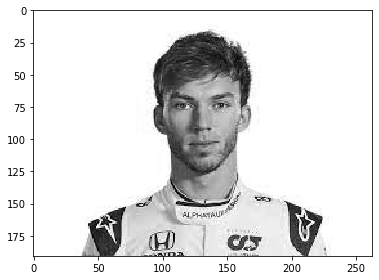

In [28]:
imshow(scarlet_gray[0])

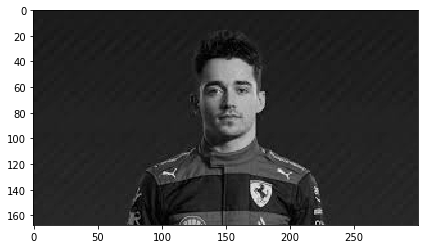

In [29]:
imshow(yogesh_gray[0])

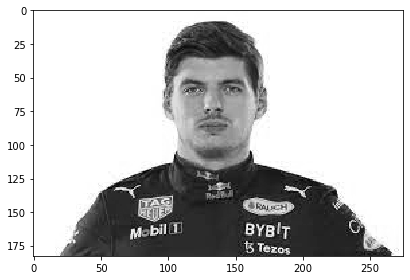

In [30]:
imshow(ashok_gray[0])

In [31]:
scarlet_gray[2].shape

(183, 275)

In [32]:
for j in range(10):
    scarlet_temp=scarlet_gray[j]
    scarlet_gray[j]=resize(scarlet_temp,(512,512))

In [33]:
for j in range(10):
    yogesh_temp=yogesh_gray[j]
    yogesh_gray[j]=resize(yogesh_temp,(512,512))
for j in range(10):
    ashok_temp=ashok_gray[j]
    ashok_gray[j]=resize(ashok_temp,(512,512))



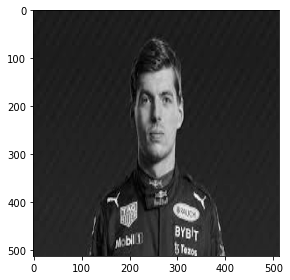

In [34]:
imshow(ashok_gray[2])

In [35]:
len_of_scarlet=len(scarlet_gray)
len_of_ashok=len(ashok_gray)
len_of_yogesh=len(yogesh_gray)


In [36]:
image_size_scarlet=scarlet_gray[1].shape
image_size_yogesh=yogesh_gray[1].shape
image_size_ashok=ashok_gray[1].shape

In [37]:
image_size_scarlet

(512, 512)

In [38]:
flatten_size_scarlet=image_size_scarlet[0]*image_size_scarlet[1]
flatten_size_yogesh=image_size_yogesh[0]*image_size_yogesh[1]
flatten_size_ashok=image_size_ashok[0]*image_size_ashok[1]

In [39]:
flatten_size_scarlet

262144

In [40]:
for i in range(len_of_scarlet):
    scarlet_gray[i]= np.ndarray.flatten(scarlet_gray[i].reshape(flatten_size_scarlet,1))
for i in range(len_of_yogesh):
    yogesh_gray[i]= np.ndarray.flatten(yogesh_gray[i].reshape(flatten_size_yogesh,1))
for i in range(len_of_ashok):
    ashok_gray[i]= np.ndarray.flatten(ashok_gray[i].reshape(flatten_size_ashok,1))

In [41]:
scarlet_gray=np.dstack(scarlet_gray)
yogesh_gray=np.dstack(yogesh_gray)
ashok_gray=np.dstack(ashok_gray)

In [42]:
ashok_gray.shape

(1, 262144, 10)

In [43]:
scarlet_gray=np.rollaxis(scarlet_gray,axis=2,start=0)
yogesh_gray=np.rollaxis(yogesh_gray,axis=2,start=0)
ashok_gray=np.rollaxis(ashok_gray,axis=2,start=0)
ashok_gray.shape



(10, 1, 262144)

In [44]:
yogesh_gray=np.rollaxis(yogesh_gray,axis=2,start=1)
scarlet_gray=np.rollaxis(scarlet_gray,axis=2,start=1)
ashok_gray=np.rollaxis(ashok_gray,axis=2,start=1)

In [45]:
ashok_gray.shape

(10, 262144, 1)

In [46]:
scarlet_gray=scarlet_gray.reshape(len_of_scarlet,flatten_size_scarlet)
yogesh_gray=yogesh_gray.reshape(len_of_yogesh,flatten_size_yogesh)
ashok_gray=ashok_gray.reshape(len_of_ashok,flatten_size_ashok)

In [47]:
yogesh_gray.shape

(10, 262144)

In [48]:
scarlet_data=pd.DataFrame(scarlet_gray)
ashok_data=pd.DataFrame(ashok_gray)
yogesh_data=pd.DataFrame(yogesh_gray)


In [49]:
yogesh_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.111335,0.111335,0.111335,0.111335,0.111335,0.111335,0.111335,0.111335,0.111335,0.111335,...,0.148271,0.147469,0.149318,0.163105,0.170050,0.169383,0.169227,0.169227,0.169227,0.169227
1,0.383226,0.383226,0.383226,0.383704,0.384381,0.384486,0.384486,0.385892,0.387230,0.387906,...,0.373440,0.371333,0.370284,0.369338,0.365865,0.362707,0.361278,0.360069,0.359392,0.359298
2,0.033239,0.033193,0.031209,0.027104,0.021153,0.017415,0.015431,0.014600,0.014600,0.015799,...,0.187487,0.186455,0.186876,0.188783,0.192751,0.194964,0.194964,0.194964,0.194964,0.194964
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.473309,0.473309,0.473309,0.474512,0.475549,0.475549,0.475469,0.475305,0.476268,0.477506,...,0.029857,0.033198,0.034133,0.026304,0.024721,0.029056,0.021113,0.010868,0.010868,0.010868
5,0.094358,0.094263,0.093939,0.092541,0.091290,0.090750,0.089837,0.088590,0.086894,0.085063,...,0.371238,0.375674,0.378952,0.379724,0.383028,0.389150,0.396157,0.403457,0.411109,0.413353
6,0.686318,0.686318,0.686318,0.686318,0.686138,0.685366,0.684197,0.682672,0.682397,0.682136,...,0.472900,0.475855,0.479316,0.485746,0.489702,0.490905,0.492538,0.494185,0.494021,0.493973
7,0.165601,0.165507,0.164830,0.164632,0.164632,0.163424,0.161994,0.161401,0.160743,0.159520,...,0.236852,0.239714,0.241912,0.244005,0.245281,0.246255,0.245578,0.244681,0.243252,0.243054
8,0.004487,0.004487,0.004487,0.004487,0.004487,0.004487,0.004487,0.004487,0.004487,0.004487,...,0.123623,0.123623,0.123623,0.123665,0.126219,0.128378,0.128378,0.128378,0.128378,0.128378
9,0.323324,0.323418,0.324094,0.325518,0.327252,0.328977,0.330701,0.332942,0.335124,0.336816,...,0.191071,0.196347,0.198482,0.200325,0.210767,0.219264,0.217115,0.215496,0.215156,0.215109


In [76]:
scarlet_data["label"]="Piere Gasly"
yogesh_data["label"]="Charles Leclerc"
ashok_data["label"]="Max vestappen"


In [77]:
ashok_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.986267,0.987419,0.986772,0.993940,1.000000,1.000000,1.000000,1.000000,1.000000,Max vestappen
1,0.303242,0.303405,0.307670,0.315830,0.327081,0.339293,0.352156,0.365625,0.379444,0.392920,...,0.663142,0.657145,0.649685,0.639690,0.630251,0.621631,0.613288,0.605292,0.604985,Max vestappen
2,0.140851,0.140403,0.138877,0.135900,0.132119,0.125997,0.120679,0.116084,0.109604,0.103058,...,0.153541,0.155056,0.163476,0.167910,0.167910,0.167910,0.167910,0.167910,0.167910,Max vestappen
3,0.973028,0.973028,0.973028,0.974808,0.976667,0.976667,0.976667,0.976667,0.976943,0.977416,...,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,Max vestappen
4,0.631167,0.631213,0.633196,0.634851,0.636218,0.638274,0.640873,0.643115,0.645099,0.647083,...,0.892168,0.892168,0.892525,0.893375,0.893850,0.893850,0.893850,0.893850,0.893850,Max vestappen
5,0.755351,0.755351,0.755351,0.755105,0.752273,0.749441,0.749203,0.749570,0.748021,0.744813,...,0.045095,0.045315,0.052557,0.058967,0.061800,0.064632,0.064422,0.063923,0.064061,Max vestappen
6,0.973028,0.973028,0.973028,0.974808,0.976667,0.976667,0.976667,0.976667,0.976943,0.977416,...,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,Max vestappen
7,0.755351,0.755351,0.755351,0.755105,0.752273,0.749441,0.749203,0.749570,0.748021,0.744813,...,0.045095,0.045315,0.052557,0.058967,0.061800,0.064632,0.064422,0.063923,0.064061,Max vestappen
8,0.555358,0.555358,0.555358,0.555358,0.555358,0.555358,0.555358,0.555358,0.555358,0.555358,...,0.981776,0.981776,0.981792,0.982803,0.983657,0.983657,0.983657,0.983657,0.983657,Max vestappen
9,0.628820,0.629372,0.631608,0.635146,0.638965,0.643438,0.647911,0.652384,0.656857,0.661330,...,0.631873,0.636543,0.645014,0.648089,0.648089,0.648743,0.649679,0.651915,0.652467,Max vestappen


In [78]:
img_1=pd.concat([scarlet_data,yogesh_data])

In [79]:
img=pd.concat([img_1,ashok_data])

In [80]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Piere Gasly
1,0.854225,0.855238,0.858692,0.861059,0.863001,0.863772,0.862521,0.859451,0.853246,0.846037,...,0.055308,0.054917,0.052452,0.051031,0.050771,0.051470,0.052350,0.051480,0.051225,Piere Gasly
2,0.304195,0.304195,0.304195,0.302920,0.301117,0.299058,0.296951,0.293662,0.290536,0.288733,...,0.555657,0.530553,0.508077,0.473369,0.433419,0.364792,0.338886,0.416202,0.426886,Piere Gasly
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Piere Gasly
4,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,...,0.908921,0.923848,0.939761,0.946001,0.952849,0.963022,0.951209,0.886271,0.877298,Piere Gasly
5,0.809934,0.808036,0.794305,0.776824,0.757791,0.738122,0.718336,0.690929,0.661955,0.622600,...,0.677144,0.459191,0.235646,0.205473,0.179963,0.179963,0.179963,0.179963,0.179963,Piere Gasly
6,0.111580,0.111580,0.111580,0.111580,0.111580,0.111580,0.111580,0.111580,0.111580,0.111580,...,0.153846,0.153846,0.153846,0.153846,0.155447,0.157270,0.157768,0.157768,0.157768,Piere Gasly
7,0.993028,0.993028,0.993028,0.993028,0.993028,0.993028,0.993028,0.993028,0.993028,0.993028,...,0.826514,0.826653,0.827425,0.827832,0.827832,0.827832,0.827832,0.827832,0.827832,Piere Gasly
8,0.425636,0.425699,0.427079,0.429957,0.433970,0.438011,0.442069,0.446097,0.450111,0.455098,...,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,Piere Gasly
9,0.766795,0.764082,0.744449,0.719266,0.691786,0.669557,0.648288,0.645202,0.644343,0.657354,...,0.454949,0.450112,0.445651,0.432113,0.420667,0.420667,0.420248,0.418819,0.418621,Piere Gasly


In [81]:
from sklearn.utils import shuffle

In [82]:
img_shuffle = shuffle(img).reset_index()

In [83]:
img_shuffle

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,2,0.033239,0.033193,0.031209,0.027104,0.021153,0.017415,0.015431,0.014600,0.014600,...,0.186455,0.186876,0.188783,0.192751,0.194964,0.194964,0.194964,0.194964,0.194964,Charles Leclerc
1,3,0.973028,0.973028,0.973028,0.974808,0.976667,0.976667,0.976667,0.976667,0.976943,...,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,Max vestappen
2,5,0.755351,0.755351,0.755351,0.755105,0.752273,0.749441,0.749203,0.749570,0.748021,...,0.045095,0.045315,0.052557,0.058967,0.061800,0.064632,0.064422,0.063923,0.064061,Max vestappen
3,4,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,...,0.908921,0.923848,0.939761,0.946001,0.952849,0.963022,0.951209,0.886271,0.877298,Piere Gasly
4,6,0.686318,0.686318,0.686318,0.686318,0.686138,0.685366,0.684197,0.682672,0.682397,...,0.475855,0.479316,0.485746,0.489702,0.490905,0.492538,0.494185,0.494021,0.493973,Charles Leclerc
5,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Charles Leclerc
6,8,0.425636,0.425699,0.427079,0.429957,0.433970,0.438011,0.442069,0.446097,0.450111,...,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,Piere Gasly
7,1,0.383226,0.383226,0.383226,0.383704,0.384381,0.384486,0.384486,0.385892,0.387230,...,0.371333,0.370284,0.369338,0.365865,0.362707,0.361278,0.360069,0.359392,0.359298,Charles Leclerc
8,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.986267,0.987419,0.986772,0.993940,1.000000,1.000000,1.000000,1.000000,1.000000,Max vestappen
9,6,0.973028,0.973028,0.973028,0.974808,0.976667,0.976667,0.976667,0.976667,0.976943,...,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,Max vestappen


In [84]:
img_shuffle=img_shuffle.drop(['index'],axis=1)

In [85]:
img_shuffle

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.033239,0.033193,0.031209,0.027104,0.021153,0.017415,0.015431,0.014600,0.014600,0.015799,...,0.186455,0.186876,0.188783,0.192751,0.194964,0.194964,0.194964,0.194964,0.194964,Charles Leclerc
1,0.973028,0.973028,0.973028,0.974808,0.976667,0.976667,0.976667,0.976667,0.976943,0.977416,...,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,Max vestappen
2,0.755351,0.755351,0.755351,0.755105,0.752273,0.749441,0.749203,0.749570,0.748021,0.744813,...,0.045095,0.045315,0.052557,0.058967,0.061800,0.064632,0.064422,0.063923,0.064061,Max vestappen
3,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,0.827972,...,0.908921,0.923848,0.939761,0.946001,0.952849,0.963022,0.951209,0.886271,0.877298,Piere Gasly
4,0.686318,0.686318,0.686318,0.686318,0.686138,0.685366,0.684197,0.682672,0.682397,0.682136,...,0.475855,0.479316,0.485746,0.489702,0.490905,0.492538,0.494185,0.494021,0.493973,Charles Leclerc
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Charles Leclerc
6,0.425636,0.425699,0.427079,0.429957,0.433970,0.438011,0.442069,0.446097,0.450111,0.455098,...,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,0.177386,Piere Gasly
7,0.383226,0.383226,0.383226,0.383704,0.384381,0.384486,0.384486,0.385892,0.387230,0.387906,...,0.371333,0.370284,0.369338,0.365865,0.362707,0.361278,0.360069,0.359392,0.359298,Charles Leclerc
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.986267,0.987419,0.986772,0.993940,1.000000,1.000000,1.000000,1.000000,1.000000,Max vestappen
9,0.973028,0.973028,0.973028,0.974808,0.976667,0.976667,0.976667,0.976667,0.976943,0.977416,...,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,0.892231,Max vestappen


In [86]:
img_shuffle.shape

(30, 262145)

In [87]:
x = img_shuffle.values[:,:-1]

In [88]:
y= img_shuffle.values[:,-1]

In [89]:
x

array([[0.033238939950980394, 0.03319298406862745, 0.031209221813725492,
        ..., 0.19496431372549022, 0.1949643137254902, 0.1949643137254902],
       [0.9730278431372549, 0.9730278431372549, 0.973027843137255, ...,
        0.8922310929840686, 0.8922310929840686, 0.8922310929840687],
       [0.7553505882352942, 0.7553505882352941, 0.7553505882352942, ...,
        0.0644220147708818, 0.06392320097343594, 0.06406065188650992],
       ...,
       [0.6311666973039216, 0.6312126531862745, 0.6331964154411764, ...,
        0.8938498039215685, 0.8938498039215685, 0.8938498039215685],
       [0.3032415309079488, 0.30340496035519765, 0.30767046892839317,
        ..., 0.6132879764093137, 0.6052916528799019, 0.6049852803308824],
       [0.11158, 0.11157999999999998, 0.11158, ..., 0.1577678431372549,
        0.1577678431372549, 0.1577678431372549]], dtype=object)

In [90]:
y

array(['Charles Leclerc', 'Max vestappen', 'Max vestappen', 'Piere Gasly',
       'Charles Leclerc', 'Charles Leclerc', 'Piere Gasly',
       'Charles Leclerc', 'Max vestappen', 'Max vestappen', 'Piere Gasly',
       'Max vestappen', 'Piere Gasly', 'Piere Gasly', 'Charles Leclerc',
       'Piere Gasly', 'Piere Gasly', 'Max vestappen', 'Charles Leclerc',
       'Max vestappen', 'Piere Gasly', 'Charles Leclerc',
       'Charles Leclerc', 'Charles Leclerc', 'Charles Leclerc',
       'Piere Gasly', 'Max vestappen', 'Max vestappen', 'Max vestappen',
       'Piere Gasly'], dtype=object)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [92]:
from sklearn import svm

In [93]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [94]:
y_pred=clf.predict(x_test)

In [95]:
y_pred

array(['Charles Leclerc', 'Charles Leclerc', 'Piere Gasly', 'Piere Gasly',
       'Piere Gasly', 'Charles Leclerc', 'Piere Gasly', 'Charles Leclerc'],
      dtype=object)

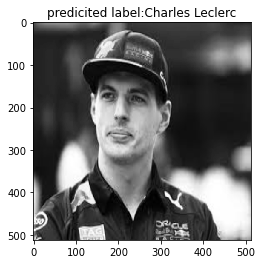

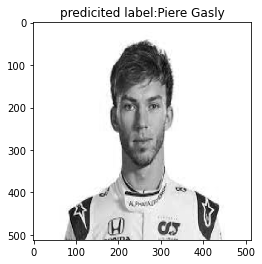

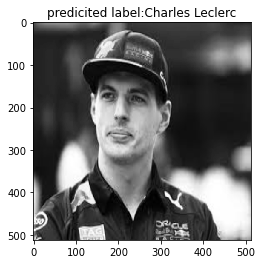

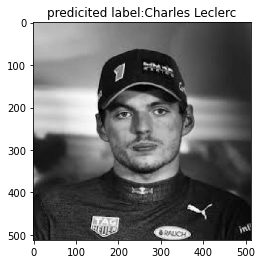

In [96]:
for i in (np.random.randint(0,6,4)):
    predicted_images = (np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicited label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [97]:
from sklearn import metrics

In [98]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [99]:
accuracy

0.375

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
confusion_matrix(y_test,y_pred)

array([[1, 0, 0],
       [3, 0, 2],
       [0, 0, 2]], dtype=int64)